<a href="https://www.kaggle.com/code/sathyadatascience/avatar-retail-analytics?scriptVersionId=102198537" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/retaildataset/stores data-set.csv
/kaggle/input/retaildataset/Features data set.csv
/kaggle/input/retaildataset/sales data-set.csv


Step 1: Load of Raw Data into the Data Frame 
Here below 3 Raw data files are loaded as Dataframes
1. Features data set.csv
2. sales data-set.csv
3. stores data-set.csv

In [2]:
df_feature=pd.read_csv('/kaggle/input/retaildataset/Features data set.csv')
df_sales=pd.read_csv('/kaggle/input/retaildataset/sales data-set.csv')
df_stores=pd.read_csv('/kaggle/input/retaildataset/stores data-set.csv')

Step 2: Validate the Dataframe by selecting the first 10 lines using the head Command

In [3]:
print(df_feature.head(10))
print(df_sales.head(10))
print(df_stores.head(10))

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   
5      1  12/03/2010        57.79       2.667        NaN        NaN   
6      1  19/03/2010        54.58       2.720        NaN        NaN   
7      1  26/03/2010        51.45       2.732        NaN        NaN   
8      1  02/04/2010        62.27       2.719        NaN        NaN   
9      1  09/04/2010        65.86       2.770        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       Tru

Step 3: Checking Metadata of the Dataframe

In [4]:
print(df_feature.describe())
print(df_sales.describe())
print(df_stores.describe())

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

In [5]:
df_fs = pd.merge(df_feature,df_sales, left_on =['Store','Date','IsHoliday'],right_on=['Store','Date','IsHoliday'])
df_fss = pd.merge(df_fs,df_stores, left_on =['Store'],right_on=['Store'])
df_fss.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Dept              int64
Weekly_Sales    float64
Type             object
Size              int64
dtype: object

In [6]:
#Converting the column to the Date Data type
df_fss['Date']=pd.to_datetime(df_fss['Date'])


In [7]:
#Count of Duplicates
df_fss.duplicated().sum()

0

In [8]:
store_sales_df = df_fss.groupby(['Store','Dept'], as_index=False).agg(Sum_of_Weekly_Sales=('Weekly_Sales','sum'))

In [9]:
store_sales_df['Store'] = store_sales_df['Store'].astype(int)
store_sales_df['Dept'] = store_sales_df['Dept'].astype(int)
store_sales_df.describe(include='all')
store_sales_df.count()

Store                  3331
Dept                   3331
Sum_of_Weekly_Sales    3331
dtype: int64

In [10]:
def bar_plot(x_col, y_col):
    plt.figure(figsize =(25, 10))
    x = x_col
    y = y_col
    plt.bar(x, y)
    plt.xticks(x) # ====> to show all values of x-axis
    plt.show()

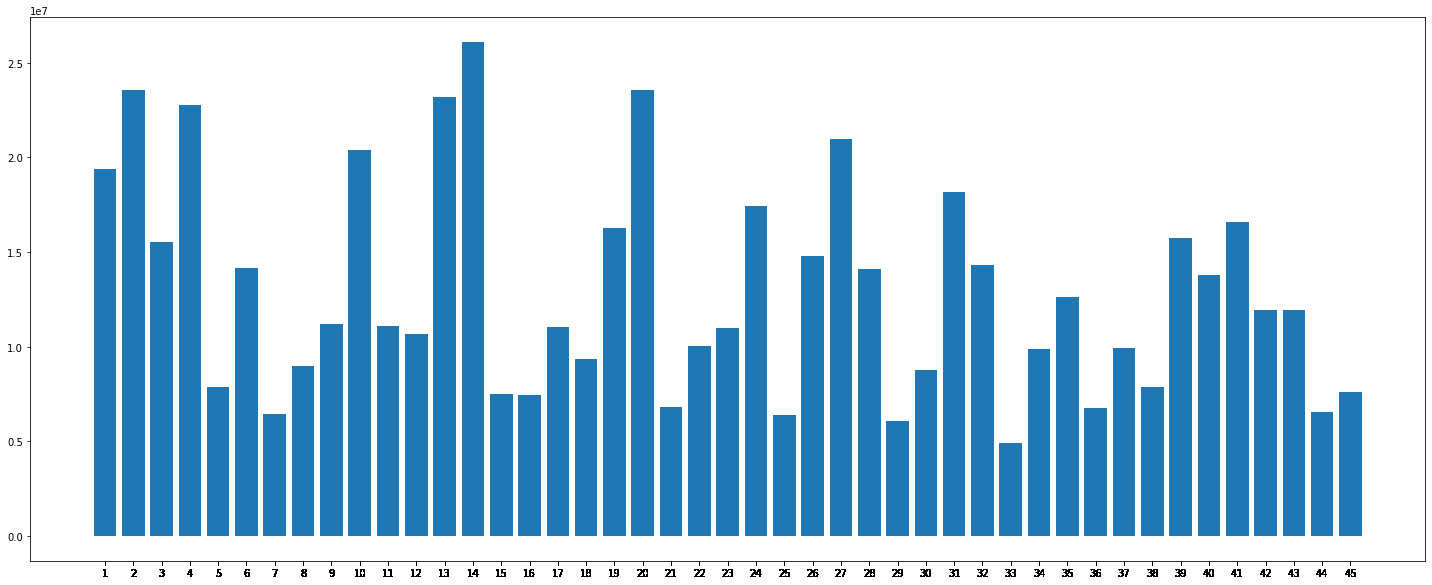

In [11]:
bar_plot(x_col=store_sales_df['Store'],y_col=store_sales_df['Sum_of_Weekly_Sales'])

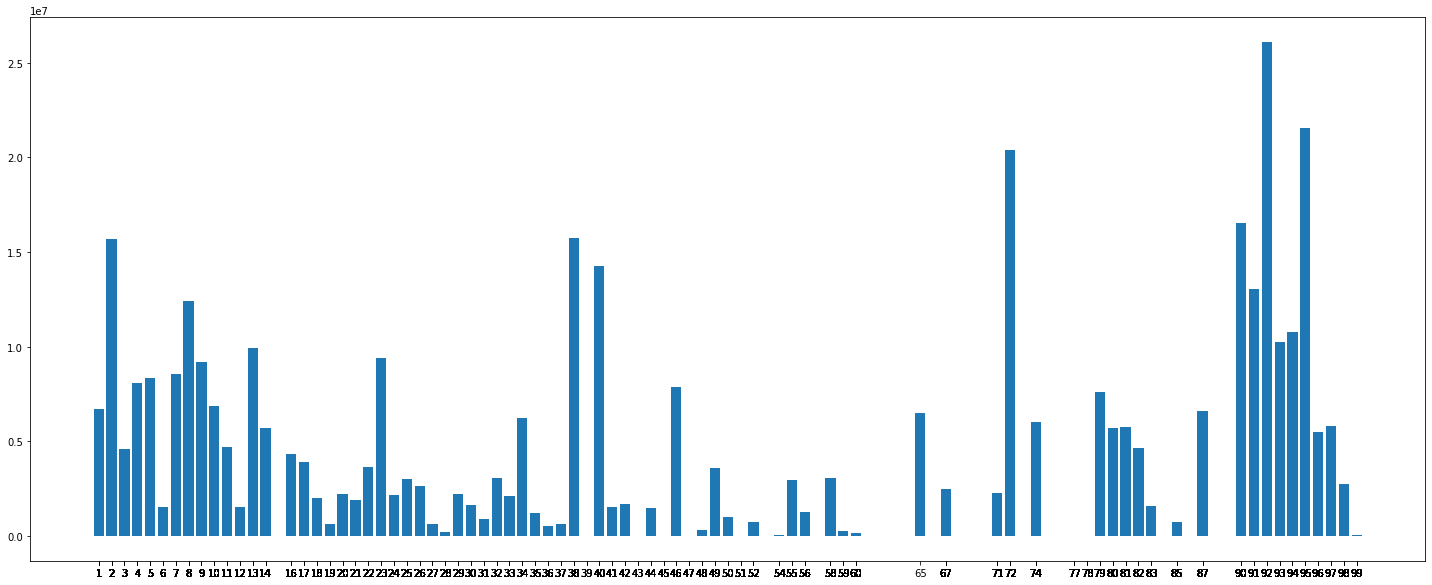

In [12]:
bar_plot(x_col=store_sales_df['Dept'],y_col=store_sales_df['Sum_of_Weekly_Sales'])

In [13]:
df_fss['Year'] = pd.DatetimeIndex(df_fss['Date']).year
df_fss['Month'] = pd.DatetimeIndex(df_fss['Date']).month
df_fss['Quarter'] = pd.DatetimeIndex(df_fss['Date']).quarter
df_fss['Quarter'] = pd.DatetimeIndex(df_fss['Date']).quarter
df_fss['MarkDown1']=df_fss['MarkDown1'].fillna(0)
df_fss['MarkDown2']=df_fss['MarkDown2'].fillna(0)
df_fss['MarkDown3']=df_fss['MarkDown3'].fillna(0)
df_fss['MarkDown4']=df_fss['MarkDown4'].fillna(0)
df_fss['MarkDown5']=df_fss['MarkDown5'].fillna(0)
#df_fss.head(10)
#df_fss[df_fss['MarkDown1']>0]

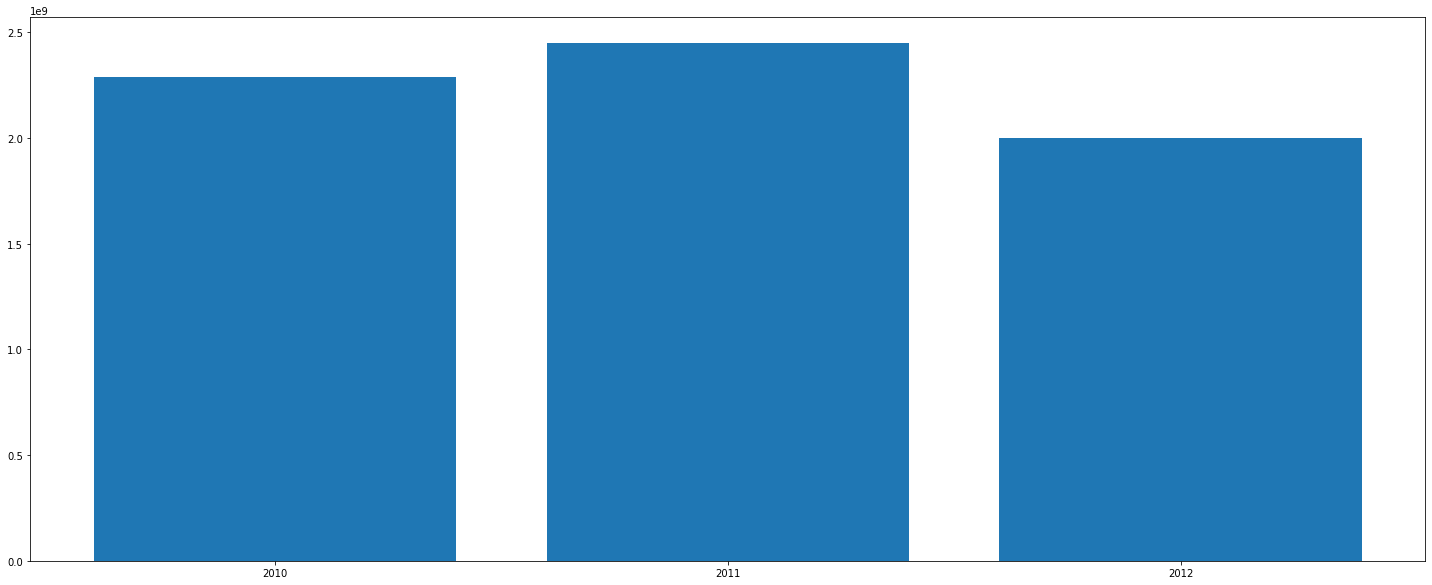

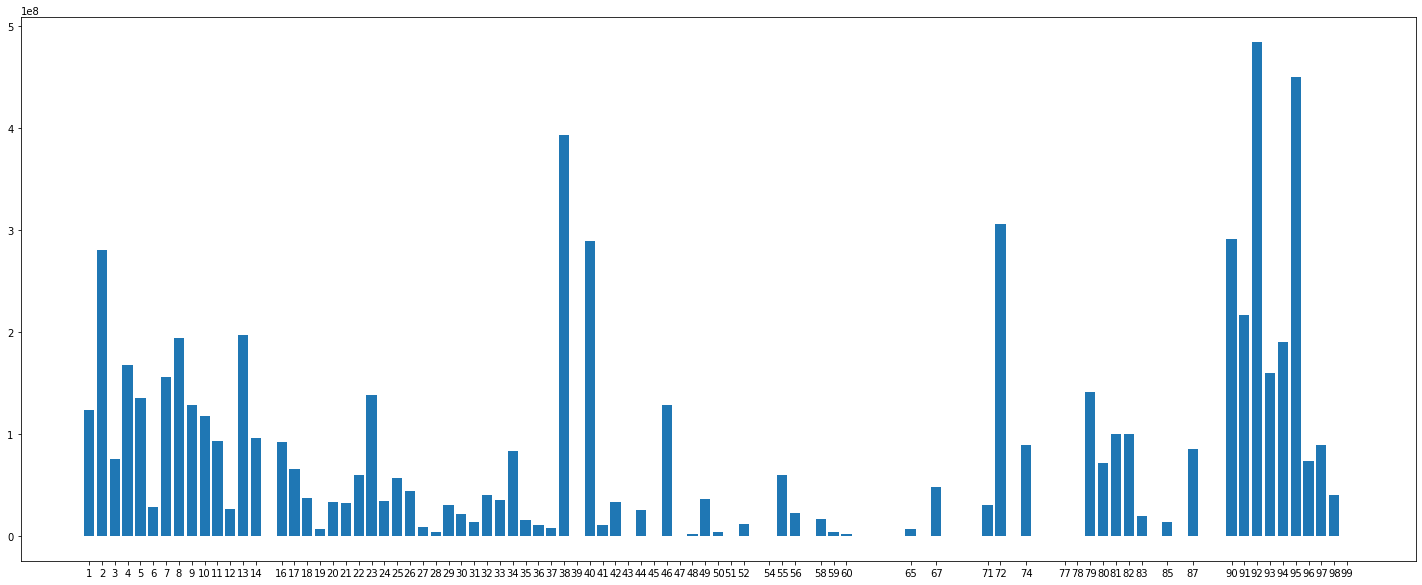

In [14]:
df_fss_s14=df_fss[df_fss['Store']==14]
store_14_year = df_fss.groupby(['Year'], as_index=False).agg(Sum_of_Weekly_Sales=('Weekly_Sales','sum'))
Dept_14_year = df_fss.groupby(['Dept'], as_index=False).agg(Sum_of_Weekly_Sales_Dept=('Weekly_Sales','sum'))
bar_plot(x_col=store_14_year['Year'],y_col=store_14_year['Sum_of_Weekly_Sales']) 
bar_plot(x_col=Dept_14_year['Dept'],y_col=Dept_14_year['Sum_of_Weekly_Sales_Dept']) 